STEP 1:"IMPORTING LIBRARY"

In [1]:
!pip install tensorflow keras numpy pandas matplotlib scikit-learn opencv-python


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import shutil
import random 

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models


STEP 2:"LOADING DATASET"

In [5]:
data_dir = "C:\\Users\\hp\\Downloads\\archive\\COVID-19_Radiography_Dataset"


STEP 3:"VISUALIZING THE EXCEL DATASET"

1.CORONA DATASET

In [10]:
covid = pd.read_excel(os.path.join(data_dir, "COVID.metadata.xlsx"))
covid.head()


,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [12]:
covid.info


<bound method DataFrame.info of        FILE NAME FORMAT     SIZE  \
0        COVID-1    PNG  256*256   
1        COVID-2    PNG  256*256   
2        COVID-3    PNG  256*256   
3        COVID-4    PNG  256*256   
4        COVID-5    PNG  256*256   
...          ...    ...      ...   
3611  COVID-3612    PNG  256*256   
3612  COVID-3613    PNG  256*256   
3613  COVID-3614    PNG  256*256   
3614  COVID-3615    PNG  256*256   
3615  COVID-3616    PNG  256*256   

                                                    URL  
0     https://sirm.org/category/senza-categoria/covi...  
1     https://sirm.org/category/senza-categoria/covi...  
2     https://sirm.org/category/senza-categoria/covi...  
3     https://sirm.org/category/senza-categoria/covi...  
4     https://sirm.org/category/senza-categoria/covi...  
...                                                 ...  
3611  https://bimcv.cipf.es/bimcv-projects/bimcv-cov...  
3612  https://bimcv.cipf.es/bimcv-projects/bimcv-cov...  
3613  https:/

In [14]:
covid.shape

(3616, 4)

2.NORMAL DATASET

In [17]:
normal= pd.read_excel(os.path.join(data_dir, "Normal.metadata.xlsx"))
normal.head()


,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [18]:
normal.info

<bound method DataFrame.info of           FILE NAME FORMAT     SIZE  \
0          NORMAL-1    PNG  256*256   
1          NORMAL-2    PNG  256*256   
2          NORMAL-3    PNG  256*256   
3          NORMAL-4    PNG  256*256   
4          NORMAL-5    PNG  256*256   
...             ...    ...      ...   
10187  NORMAL-10188    PNG  256*256   
10188  NORMAL-10189    PNG  256*256   
10189  NORMAL-10190    PNG  256*256   
10190  NORMAL-10191    PNG  256*256   
10191  NORMAL-10192    PNG  256*256   

                                                     URL  
0      https://www.kaggle.com/c/rsna-pneumonia-detect...  
1      https://www.kaggle.com/c/rsna-pneumonia-detect...  
2      https://www.kaggle.com/c/rsna-pneumonia-detect...  
3      https://www.kaggle.com/c/rsna-pneumonia-detect...  
4      https://www.kaggle.com/c/rsna-pneumonia-detect...  
...                                                  ...  
10187  https://www.kaggle.com/paultimothymooney/chest...  
10188  https://www.kaggle.c

In [21]:
normal.shape

(10192, 4)

In [23]:
print("Normal Dataset Columns:", normal.columns)
print("COVID Dataset Columns:", covid.columns)

Normal Dataset Columns: Index(['FILE NAME', 'FORMAT', 'SIZE', 'URL'], dtype='object')
COVID Dataset Columns: Index(['FILE NAME', 'FORMAT', 'SIZE', 'URL'], dtype='object')


"IMPORTING THE IMAGE DATASET"

In [26]:
image_normal_dir = "C:\\Users\\hp\\Downloads\\archive\\COVID-19_Radiography_Dataset\\Normal\\images"
image_covid_dir = "C:\\Users\\hp\\Downloads\\archive\\COVID-19_Radiography_Dataset\\COVID\\images"


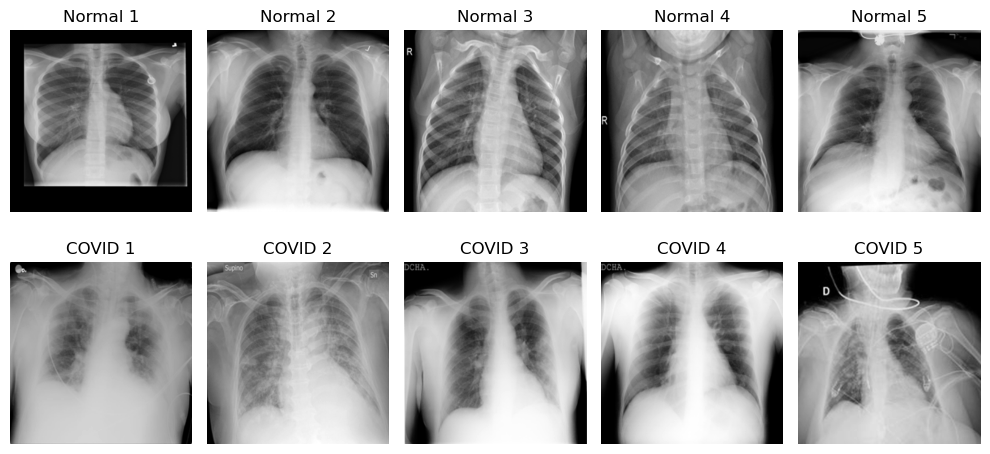

In [28]:
normal_images = [f for f in os.listdir(image_normal_dir) if f.endswith('.png')]
covid_images = [f for f in os.listdir(image_covid_dir) if f.endswith('.png')]

# Select a few images to display (e.g., first 5 images from each folder)
sample_normal = normal_images[:5]
sample_covid = covid_images[:5]

# Create a figure with subplots
plt.figure(figsize=(10, 5))

# Display Normal images
for i, img_name in enumerate(sample_normal):
    img_path = os.path.join(image_normal_dir, img_name)
    img = Image.open(img_path)
    plt.subplot(2, 5, i+1)  # 2 rows, 5 columns
    plt.imshow(img,cmap="gray")
    plt.title(f"Normal {i+1}")
    plt.axis('off')  # Hide axes

# Display COVID images
for i, img_name in enumerate(sample_covid):
    img_path = os.path.join(image_covid_dir, img_name)
    img = Image.open(img_path)
    plt.subplot(2, 5, i+6)  # 2 rows, 5 columns
    plt.imshow(img,cmap="gray")
    plt.title(f"COVID {i+1}")
    plt.axis('off')  # Hide axes

# Show the plot
plt.tight_layout()
plt.show()

"PREPROCCESING"

Directories

In [21]:
# Input directories
image_normal_dir = "C:\\Users\\hp\\Downloads\\archive\\COVID-19_Ra
diography_Dataset\\Normal\\images"
image_covid_dir = "C:\\Users\\hp\\Downloads\\archive\\COVID-19_Radiography_Dataset\\COVID\\images"

# Output directories
output_normal_dir = "C:\\Users\\hp\\Downloads\\archive\\COVID-19_Radiography_Dataset\\output_normal_dir"
output_covid_dir = "C:\\Users\\hp\\Downloads\\archive\\COVID-19_Radiography_Dataset\\output_covid_dir"
os.makedirs(output_normal_dir, exist_ok=True)
os.makedirs(output_covid_dir, exist_ok=True)

Annotation Removal (Placeholder for ENSNet)

In [24]:
def remove_annotations(image):
    # Replace this function with ENSNet implementation if available
    return image 

Histogram Equalization

In [26]:
def histogram_equalization(image):
    if len(image.shape) == 2:  # Grayscale image
        return cv2.equalizeHist(image)
    elif len(image.shape) == 3:  # Color image
        ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)


CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [28]:
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    if len(image.shape) == 2:  # Grayscale image
        return clahe.apply(image)
    elif len(image.shape) == 3:  # Color image
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        lab[:, :, 0] = clahe.apply(lab[:, :, 0])
        return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)


Normalization

In [30]:
def normalize_image(image):
    return cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)


Resizing

In [32]:
def resize_image(image, size=(224, 224)):
    return cv2.resize(image, size)


Data Augmentation

In [34]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    height_shift_range=0.2,
    width_shift_range=0.2
)

def augment_image(image, output_dir, filename, augment_count=3):
    image = np.expand_dims(image, axis=0)
    for i, aug_image in enumerate(datagen.flow(image, batch_size=1)):
        aug_image = aug_image[0].astype(np.uint8)
        aug_filename = f"{os.path.splitext(filename)[0]}_aug_{i}.png"
        aug_output_path = os.path.join(output_dir, aug_filename)
        cv2.imwrite(aug_output_path, aug_image)
        if i >= augment_count - 1:  # Save only a few augmented images
            break


Full Pipeline to Process Images

In [36]:
def process_images(input_dir, output_dir):
    for filename in os.listdir(input_dir):
        filepath = os.path.join(input_dir, filename)
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
        
        # Read image
        image = cv2.imread(filepath)
        if image is None:
            continue
        
        # Apply each preprocessing step
        image = remove_annotations(image)
        image = histogram_equalization(image)
        image = apply_clahe(image)
        image = normalize_image(image)
        image = resize_image(image)
        
        # Save processed image
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, image)
        
        # Perform data augmentation
        augment_image(image, output_dir, filename)

# Process images for both directories
process_images(image_normal_dir, output_normal_dir)
process_images(image_covid_dir, output_covid_dir)

print("Processing complete!")


Processing complete!


DATA SPLITING

80% TRAIN ,10%TEST,10%VALIDATION

In [72]:
# Input directories
output_covid_dir = "C:\\Users\\hp\\Downloads\\archive\\COVID-19_Radiography_Dataset\\output_covid_dir"
output_normal_dir = "C:\\Users\\hp\\Downloads\\archive\\COVID-19_Radiography_Dataset\\output_normal_dir"

# Base output directory for splits
base_output_dir = "C:\\Users\\hp\\Downloads\\archive\\COVID-19_Radiography_Dataset\\DATASPLIT"

# Train, validation, and test directories for Normal and COVID
train_normal_dir = os.path.join(base_output_dir, "train", "Normal")
val_normal_dir = os.path.join(base_output_dir, "val", "Normal")
test_normal_dir = os.path.join(base_output_dir, "test", "Normal")

train_covid_dir = os.path.join(base_output_dir, "train", "COVID")
val_covid_dir = os.path.join(base_output_dir, "val", "COVID")
test_covid_dir = os.path.join(base_output_dir, "test", "COVID")

# Create directories
os.makedirs(train_normal_dir, exist_ok=True)
os.makedirs(val_normal_dir, exist_ok=True)
os.makedirs(test_normal_dir, exist_ok=True)
os.makedirs(train_covid_dir, exist_ok=True)
os.makedirs(val_covid_dir, exist_ok=True)
os.makedirs(test_covid_dir, exist_ok=True)


In [74]:
def split_data(input_dir, train_dir, val_dir, test_dir, train_size=0.8, val_size=0.1, test_size=0.1):
    # List all image files in the input directory
    all_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Split into train and temp (validation + test)
    train_files, temp_files = train_test_split(all_files, test_size=(1 - train_size), random_state=42)
    
    # Split temp into validation and test
    val_split = val_size / (val_size + test_size)
    val_files, test_files = train_test_split(temp_files, test_size=(1 - val_split), random_state=42)
    
    # Copy files to respective directories
    for file in train_files:
        shutil.copy(os.path.join(input_dir, file), os.path.join(train_dir, file))
    
    for file in val_files:
        shutil.copy(os.path.join(input_dir, file), os.path.join(val_dir, file))
    
    for file in test_files:
        shutil.copy(os.path.join(input_dir, file), os.path.join(test_dir, file))

# Split data for Normal and COVID datasets
split_data(output_normal_dir, train_normal_dir, val_normal_dir, test_normal_dir)
split_data(output_covid_dir, train_covid_dir, val_covid_dir, test_covid_dir)

print("Data splitting into 80% train, 10% validation, and 10% test sets is complete!")


Data splitting into 80% train, 10% validation, and 10% test sets is complete!


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Paths to dataset
train_dir = 'C:\\Users\\hp\\Downloads\\archive\\COVID-19_Radiography_Dataset\\DATASPLIT\\train'
val_dir = 'C:\\Users\\hp\\Downloads\\archive\\COVID-19_Radiography_Dataset\\DATASPLIT\\val'
test_dir = 'C:\\Users\\hp\\Downloads\\archive\\COVID-19_Radiography_Dataset\\DATASPLIT\\test'

# Image parameters
image_size = (224, 224)
batch_size = 32
num_classes = 2  # 'covid' and 'normal'

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

# Load MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size,
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 44185 images belonging to 2 classes.
Found 5523 images belonging to 2 classes.
Found 5524 images belonging to 2 classes.


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 1030s 743ms/step - accuracy: 0.8739 - loss: 0.3087 - val_accuracy: 0.9188 - val_loss: 0.2051
Epoch 2/10
   1/1380 ━━━━━━━━━━━━━━━━━━━━ 9:46 425ms/step - accuracy: 0.9688 - loss: 0.1119

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1380/1380 ━━━━━━━━━━━━━━━━━━━━ 74s 53ms/step - accuracy: 0.9688 - loss: 0.1119 - val_accuracy: 0.9190 - val_loss: 0.2046
Epoch 3/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 1169s 847ms/step - accuracy: 0.9080 - loss: 0.2312 - val_accuracy: 0.9182 - val_loss: 0.2044
Epoch 4/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 80s 58ms/step - accuracy: 0.8125 - loss: 0.3995 - val_accuracy: 0.9242 - val_loss: 0.1932
Epoch 5/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 1129s 818ms/step - accuracy: 0.9177 - loss: 0.2041 - val_accuracy: 0.9291 - val_loss: 0.1958
Epoch 6/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 76s 55ms/step - accuracy: 0.9688 - loss: 0.1156 - val_accuracy: 0.9172 - val_loss: 0.2262
Epoch 7/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 1178s 854ms/step - accuracy: 0.9203 - loss: 0.1996 - val_accuracy: 0.9408 - val_loss: 0.1611
Epoch 8/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.9375 - loss: 0.2618 - val_accuracy: 0.9393 - val_loss: 0.1618
Epoch 9/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 1211s 877ms/step - accuracy: 0.9243 

In [19]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import wilcoxon
import time

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict the classes for the test set
steps = int(np.ceil(test_generator.samples / test_generator.batch_size))  # Cast to integer
y_pred = model.predict(test_generator, steps=steps, verbose=1)

# Ensure that we get predictions for the entire dataset
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# True labels for the test set
y_true = test_generator.classes

# Ensure the number of samples match by trimming or padding if necessary
print(f"True labels count: {len(y_true)}")
print(f"Predicted labels count: {len(y_pred_classes)}")

# If there is a mismatch, we trim the predictions to match the number of true labels
if len(y_true) != len(y_pred_classes):
    y_pred_classes = y_pred_classes[:len(y_true)]

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
TN, FP, FN, TP = cm.ravel()

# Compute additional metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)  # Recall
precision = TP / (TP + FP)
npv = TN / (TN + FN)  # Negative Predictive Value
specificity = TN / (TN + FP)
f1 = f1_score(y_true, y_pred_classes)

# Print metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Sensitivity (Recall): {sensitivity * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"NPV: {npv * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Performance comparison (Wilcoxon Signed-Rank Test) between train and test accuracy
# Assuming `train_accuracy` and `test_accuracy` are recorded during training
train_accuracy = history.history['accuracy']  # List of training accuracies per epoch
test_accuracy = [test_accuracy] * len(train_accuracy)  # Using final test accuracy for comparison

# Perform Wilcoxon Signed-Rank Test
stat, p_value = wilcoxon(train_accuracy, test_accuracy)
print(f"Wilcoxon Signed-Rank Test: Statistic={stat}, p-value={p_value}")




173/173 ━━━━━━━━━━━━━━━━━━━━ 75s 435ms/step - accuracy: 0.9268 - loss: 0.1765
Test Accuracy: 94.46%
173/173 ━━━━━━━━━━━━━━━━━━━━ 74s 427ms/step
True labels count: 5524
Predicted labels count: 5524
Accuracy: 94.46%
Sensitivity (Recall): 96.32%
Precision: 96.18%
NPV: 89.59%
Specificity: 89.22%
F1 Score: 96.25%
Wilcoxon Signed-Rank Test: Statistic=9.0, p-value=0.064453125


173/173 ━━━━━━━━━━━━━━━━━━━━ 71s 411ms/step


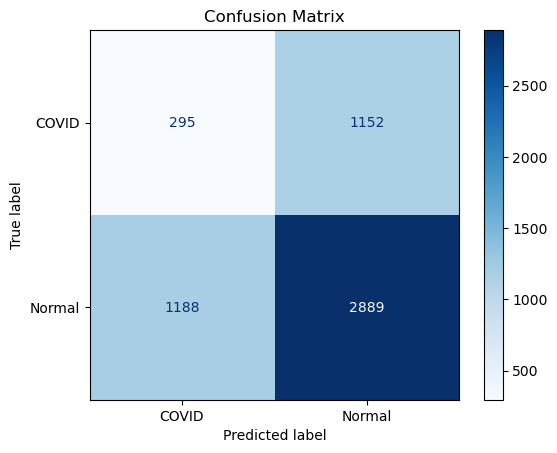

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions for the entire test set
steps = int(np.ceil(test_generator.samples / test_generator.batch_size))  # Convert to integer
y_pred = model.predict(test_generator, steps=steps, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# True labels
y_true = test_generator.classes

# Ensure the number of samples match by trimming the longer array
min_samples = min(len(y_true), len(y_pred_classes))
y_true = y_true[:min_samples]
y_pred_classes = y_pred_classes[:min_samples]

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["COVID", "Normal"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()




Randomly selected image: C:\Users\hp\Downloads\archive\COVID-19_Radiography_Dataset\DATASPLIT\train\COVID\COVID-3145_aug_0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


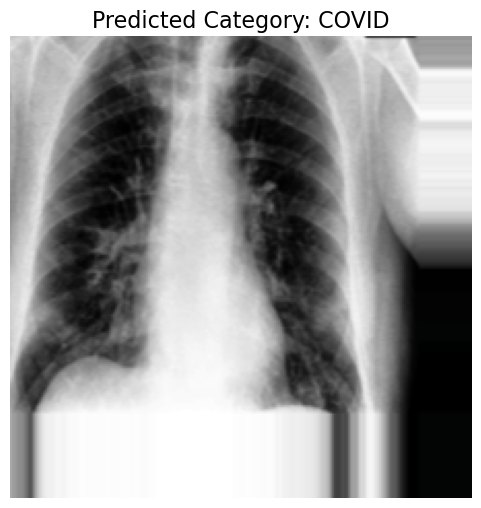

In [49]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Directories for training data
train_dir = "C:\\Users\\hp\\Downloads\\archive\\COVID-19_Radiography_Dataset\\DATASPLIT\\train"
categories = ["Normal", "COVID"]

# Select a random category and image
random_category = random.choice(categories)
category_dir = os.path.join(train_dir, random_category)
random_image_name = random.choice(os.listdir(category_dir))
random_image_path = os.path.join(category_dir, random_image_name)

print(f"Randomly selected image: {random_image_path}")

# Load and preprocess the image
img = load_img(random_image_path, target_size=(224, 224))  # Resize to model's input size
img_array = img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Normalize for MobileNetV2

# Make prediction
prediction = model.predict(img_array)

# Map prediction to category
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class = categories[predicted_class_index]

# Display the image and prediction
plt.figure(figsize=(6, 6))
plt.imshow(load_img(random_image_path))  # Show the original image
plt.title(f"Predicted Category: {predicted_class}", fontsize=16)
plt.axis('off')  # Hide axes
plt.show()
